In [29]:
import os, sys, glob

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal

import mne

import tensorpac
import pactools

In [30]:
# Set subject ID
subj_id = 10

print(os.listdir('../'))
outputs_path = '../outputs'
data_path = '../data'
meg_dir = os.path.join(data_path, f'subj_{subj_id}', 'meg')
mri_dir = os.path.join(data_path, f'subj_{subj_id}', 'mri')
fs_subjs_dir = os.path.join(data_path, 'fs_subjects_dir')

['.DS_Store', 'codes', 'data', 'plots_molly', 'outputs']


In [31]:

def mk_epochs_new(meg,  mod_freq=None, tmin=None, tmax=None, baseline=None, annot_pattern='', new_event_value=100):
    """This function creates epochs based on specified mod_freq and annotation_pattern
    Arguments:
        meg: annotated MNE object, where bad time spans are annotated as BAD_*
        tmin: start time of the epoch in seconds. This parameter should match with baseline.
        baseline: to specify baseline correction. e.g. tmin=0, baseline=(0, 0) applies no baseline correction.
        mod_freq: to specify the modulating frequency of interest. This parameter should match with the annot_pattern
        annot_pattern: The annotation pattern, based on which epochs are created.
        new_event_value: to specify new label for events. The default is 100. Optional argument.
    Returns:
        epoch: Epoch MNE object.
    Example1:
        The following call will create epochs from mod_freq=1 and encoding events, and will apply baseline correction
        between -0.5 and 0. The length of created epochs would be 8/mod_freq + abs(tmin) = 8 + 0.5 = 8.5 seconds or
        8.5 * sfreq = 8.5 * 300 samples
        mk_epochs(meg.copy(), mod_freq=1., tmin=-0.5, baseline=(-0.5, 0), annot_pattern='e/1.0/')
    Example2:
        create epochs from maintenance events with mod_freq=3.5
        mk_epochs(meg.copy(), mod_freq=3.5, tmin=0, baseline=(0, 0), annot_pattern='m/3.5/')
    Notes:
        tmin and annotation patterns should match.
        baseline = (None, 0) sets baseline to MNE defaults.
        baseline = (0, 0), tmin = 0 sets to no baseline.
        baseline = (-0.5, 0), tmin = -0.5
    """
    if not tmax:
        tmax = (8 / mod_freq) - 1 / meg.info['sfreq']
    events = mne.events_from_annotations(meg)
    annot = list(events[1].keys())
    indx_pattern = np.where([annot_pattern in k for k in annot])[0].tolist()
    event_vals_pattern = np.array(list(events[1].values()))[indx_pattern].tolist()
    indx_events = np.where(np.isin(events[0][:, 2], event_vals_pattern))[0].tolist()
    events4epoch = events[0][indx_events, :]
    events4epoch[:, 2] = new_event_value
    annot_epoch = mne.annotations_from_events(events4epoch, meg.info['sfreq'])
    meg.set_annotations(annot_epoch)
    epoch = mne.Epochs(meg, events=events4epoch, tmin=tmin, tmax=tmax, baseline=baseline)
    return epoch

In [32]:
# Load after-ICA MEG data and make epochs
meg = mne.io.read_raw_fif(os.path.join(meg_dir, 'after_ica_meg.fif'))


Opening raw data file ../data/subj_10/meg/after_ica_meg.fif...
    Read 5 compensation matrices
    Range : 0 ... 1525967 =      0.000 ...  5086.557 secs
Ready.
Opening raw data file /Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/codes/../data/subj_10/meg/after_ica_meg-1.fif...
    Read 5 compensation matrices
    Range : 1525968 ... 2103623 =   5086.560 ...  7012.077 secs
Ready.
Current compensation grade : 3


In [33]:
epoch = mk_epochs_new(meg.copy(), mod_freq=2., tmin=-0.2, baseline=None, # (-0.2, 0)
                   annot_pattern='e/2.0/', new_event_value=101)

Used Annotations descriptions: ['e/1.0/e0/t0/f/r1', 'e/1.0/e0/t0/s/r0', 'e/1.0/e0/t0/s/r1', 'e/1.0/e0/tpi/f/r0', 'e/1.0/e0/tpi/f/r1', 'e/1.0/e0/tpi/s/r0', 'e/1.0/e0/tpi/s/r1', 'e/1.0/epi/t0/f/r0', 'e/1.0/epi/t0/f/r1', 'e/1.0/epi/t0/s/r0', 'e/1.0/epi/t0/s/r1', 'e/1.0/epi/tpi/f/r0', 'e/1.0/epi/tpi/f/r1', 'e/1.0/epi/tpi/s/r0', 'e/1.0/epi/tpi/s/r1', 'e/1.5/e0/t0/f/r0', 'e/1.5/e0/t0/f/r1', 'e/1.5/e0/t0/s/r0', 'e/1.5/e0/t0/s/r1', 'e/1.5/e0/tpi/f/r0', 'e/1.5/e0/tpi/f/r1', 'e/1.5/e0/tpi/s/r0', 'e/1.5/e0/tpi/s/r1', 'e/1.5/epi/t0/f/r1', 'e/1.5/epi/t0/s/r0', 'e/1.5/epi/t0/s/r1', 'e/1.5/epi/tpi/f/r0', 'e/1.5/epi/tpi/f/r1', 'e/1.5/epi/tpi/s/r0', 'e/1.5/epi/tpi/s/r1', 'e/2.0/e0/t0/f/r0', 'e/2.0/e0/t0/f/r1', 'e/2.0/e0/t0/s/r0', 'e/2.0/e0/t0/s/r1', 'e/2.0/e0/tpi/f/r0', 'e/2.0/e0/tpi/f/r1', 'e/2.0/e0/tpi/s/r0', 'e/2.0/e0/tpi/s/r1', 'e/2.0/epi/t0/f/r0', 'e/2.0/epi/t0/f/r1', 'e/2.0/epi/t0/s/r0', 'e/2.0/epi/t0/s/r1', 'e/2.0/epi/tpi/f/r0', 'e/2.0/epi/tpi/f/r1', 'e/2.0/epi/tpi/s/r0', 'e/2.0/epi/tpi/s/r1', '

In [34]:
mne.viz.use_browser_backend('qt')
#epoch.plot(n_epochs=10, n_channels=50, scalings='auto', show=True, block=True)

In [35]:
# Covariance Matrices
data_cov = mne.compute_covariance(epoch, tmin=0.0, tmax=3.5,
                                  method='empirical')
noise_cov = mne.compute_covariance(epoch, tmin=-0.2, tmax=-0.05,
                                   method='empirical')


Removing 5 compensators from info because not all compensation channels were picked.
Loading data for 72 events and 1260 original time points ...
0 bad epochs dropped
Computing rank from data with rank=None
    Using tolerance 1.8e-08 (2.2e-16 eps * 275 dim * 3e+05  max singular value)
    Estimated rank (mag): 275
    MAG: rank 275 computed from 275 data channels with 0 projectors
Reducing data rank from 275 -> 275
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 75672
[done]
Removing 5 compensators from info because not all compensation channels were picked.
Loading data for 72 events and 1260 original time points ...
Computing rank from data with rank=None
    Using tolerance 3.9e-09 (2.2e-16 eps * 275 dim * 6.5e+04  max singular value)
    Estimated rank (mag): 275
    MAG: rank 275 computed from 275 data channels with 0 projectors
Reducing data rank from 275 -> 275
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 3312
[done]


Removing 5 compensators from info because not all compensation channels were picked.
Computing rank from covariance with rank=None
    Using tolerance 7.7e-14 (2.2e-16 eps * 275 dim * 1.3  max singular value)
    Estimated rank (mag): 265
    MAG: rank 265 computed from 275 data channels with 0 projectors


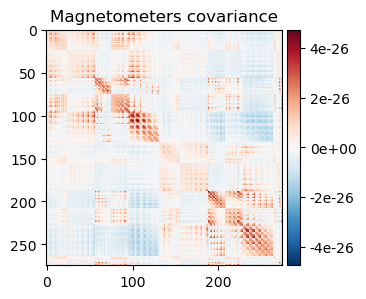

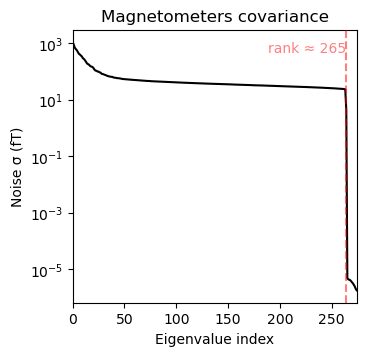

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [36]:
mne.viz.use_browser_backend('matplotlib')
mne.viz.plot_cov(noise_cov, meg.info)

In [37]:
# Load forward model
fwd = mne.read_forward_solution(os.path.join(mri_dir, 'file-fwd.fif'))


Reading forward solution from /Users/keyvan.mahjoory/k1_analyses/prj_neuroflex/neuroflex_analysis/codes/../data/subj_10/mri/file-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (8196 sources, 275 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


In [38]:
# Source Reconstruction: MNE
inv_operator = mne.minimum_norm.make_inverse_operator(epoch.info, fwd, data_cov,
                                                      loose=0.2, depth=0.8, verbose=False)

In [39]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
# Change this to free orientation according to 
# https://mne.tools/stable/generated/mne.minimum_norm.apply_inverse_epochs.html
stc = mne.minimum_norm.apply_inverse_epochs(epoch, inv_operator, lambda2, method=method, 
                           pick_ori='normal', verbose=True)

Removing 5 compensators from info because not all compensation channels were picked.
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 265 (10 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 275 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 72
Processing epoch : 2 / 72
Processing epoch : 3 / 72
Processing epoch : 4 / 72
Processing epoch : 5 / 72
Processing epoch : 6 / 72
Processing epoch : 7 / 72
Processing epoch : 8 / 72
Processing epoch : 9 / 72
Processing epoch : 10 / 72
Processing epoch : 11 / 72
Processing epoch : 12 / 72
Processing epoch : 13 / 72
Processing epoch : 14 / 72
Processing epoch : 15 / 72
Processing epoch : 16 / 72
Processing epoch : 17 / 72
Process

In [40]:
print(len(stc), stc[0].shape)
print(dir(stc[0]))
#stc[0].plot(subjects_dir=fs_subjs_dir, subject=f'subj_{subj_id}', hemi='both')

72 (8196, 1260)
['__abs__', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__iadd__', '__idiv__', '__imul__', '__init__', '__init_subclass__', '__ipow__', '__isub__', '__itruediv__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pos__', '__pow__', '__radd__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_data', '_data_ndim', '_handle_tmin_tmax', '_hemilabel_stc', '_kernel', '_kernel_removed', '_n_vertices', '_remove_kernel_sens_data_', '_sens_data', '_set_times', '_src_count', '_src_type', '_times', '_tmin', '_tstep', '_update_first_last', '_update_times', 'apply_baseline', 'bin', 'center_of_mass', 'copy', 'crop', 'data', 'decimate', 'estimate_snr', 'expand', 'extract_label_time_course', 'get_peak', 'in_lab

In [43]:
# Read Atlas labels
labels = mne.read_labels_from_annot(subject='subj_10', parc='BN_Atlas', hemi='both', 
                                   surf_name='white', annot_fname=None, regexp=None, 
                                   subjects_dir=fs_subjs_dir, sort=True, verbose=False)
labels

[<Label | subj_10, 'A1/2/3ll_L-lh', lh : 932 vertices>,
 <Label | subj_10, 'A1/2/3ll_R-rh', rh : 1135 vertices>,
 <Label | subj_10, 'A1/2/3tonIa_L-lh', lh : 1085 vertices>,
 <Label | subj_10, 'A1/2/3tonIa_R-rh', rh : 985 vertices>,
 <Label | subj_10, 'A1/2/3tru_L-lh', lh : 1668 vertices>,
 <Label | subj_10, 'A1/2/3tru_R-rh', rh : 1348 vertices>,
 <Label | subj_10, 'A1/2/3ulhf_L-lh', lh : 2293 vertices>,
 <Label | subj_10, 'A1/2/3ulhf_R-rh', rh : 1988 vertices>,
 <Label | subj_10, 'A10l_L-lh', lh : 1432 vertices>,
 <Label | subj_10, 'A10l_R-rh', rh : 1869 vertices>,
 <Label | subj_10, 'A10m_L-lh', lh : 1729 vertices>,
 <Label | subj_10, 'A10m_R-rh', rh : 1488 vertices>,
 <Label | subj_10, 'A11l_L-lh', lh : 1813 vertices>,
 <Label | subj_10, 'A11l_R-rh', rh : 2176 vertices>,
 <Label | subj_10, 'A11m_L-lh', lh : 1043 vertices>,
 <Label | subj_10, 'A11m_R-rh', rh : 1157 vertices>,
 <Label | subj_10, 'A12/47l_L-lh', lh : 1163 vertices>,
 <Label | subj_10, 'A12/47l_R-rh', rh : 885 vertices>,

In [44]:
label2index = {label.name: i for i, label in enumerate(labels)}
label2index['A1/2/3ll_L-lh']

0

In [ ]:
print(len(labels))
print([i for i in dir(labels[0]) if not i.startswith('__')])
print(labels[0].name, labels[0].hemi, labels[0].color, labels[0].pos, labels[0].vertices)


212
['_load_surface', 'center_of_mass', 'color', 'comment', 'compute_area', 'copy', 'distances_to_outside', 'filename', 'fill', 'get_tris', 'get_vertices_used', 'hemi', 'morph', 'name', 'pos', 'restrict', 'save', 'smooth', 'split', 'subject', 'values', 'vertices']
A1/2/3ll_L-lh lh (0.792156862745098, 0.5843137254901961, 0.17254901960784313, 1.0) [[-0.00983865 -0.04991762  0.04461554]
 [-0.00963816 -0.0501442   0.0439082 ]
 [-0.01003888 -0.05014765  0.04425687]
 ...
 [-0.01484996 -0.04275506  0.03888501]
 [-0.00928363 -0.03422212  0.03661797]
 [-0.00829726 -0.04838323  0.04235742]] [ 12843  12848  12849  12850  12853  12854  12858  13720  13721  13722
  13728  13729  13732  13733  13734  13735  13738  13739  13740  13743
  13744  13745  13748  13749  13750  13751  13757  13758  13759  13760
  13767  13768  13769  14702  14703  14704  14705  14709  14710  14711
  14712  14713  14716  14717  14718  14719  14722  14723  14724  14727
  14728  14729  14730  14735  14736  14737  14742  14743 

In [45]:
stc[0].in_label(labels[2])

<SourceEstimate | 45 vertices, subject : subj_10, tmin : -200.0 (ms), tmax : 3996.666666666667 (ms), tstep : 3.3333333333333335 (ms), data shape : (45, 1260), ~444 kB>

In [46]:
roimode = 'pca_flip'
roi_tcs = np.array([stc[k].extract_label_time_course(labels=labels, src=inv_operator['src'], mode=roimode) for k in range(len(stc))])
roi_tcs.shape


Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pca_flip)
Extracting time courses for 212 labels (mode: pc

(72, 212, 1260)

In [47]:
stg_l = ['A38m_L-lh', 'A41/42_L-lh', 'TE1.0/TE1.2_L-lh', 'A22c_L-lh',  'A22r_L-lh']    #'A38l_L-lh',
stg_r = ['A38m_R-rh', 'A41/42_R-rh', 'TE1.0/TE1.2_R-rh', 'A22c_R-rh', 'A22r_R-rh'] # , 'A38l_R-rh'

In [56]:
ix_seed = label2index['A22r_R-rh']
seed_tcs = roi_tcs[:, ix_seed, :]
print(seedl_tcs.shape)

(72, 1260)


In [57]:
seed_psd = tensorpac.utils.PSD(seed_tcs, meg.info['sfreq'])


Compute PSD over 72 trials and 1260 time points


    Add 95th confidence interval


<AxesSubplot: title={'center': 'PSD mean over 72 trials'}, xlabel='Frequencies (Hz)', ylabel='Power (V**2/Hz)'>

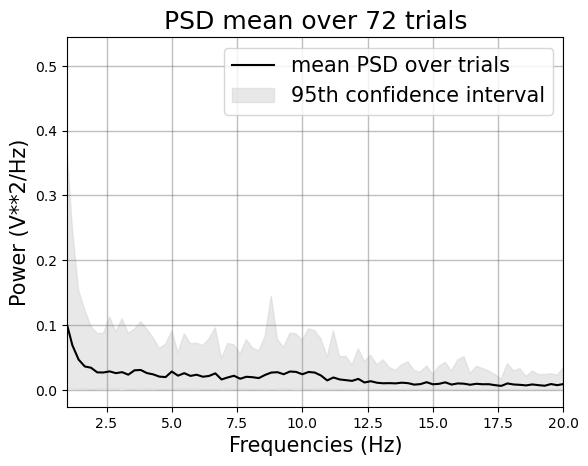

In [58]:
seed_psd.plot(f_min=1, f_max=20)

In [86]:
# define a pac object and extract high-resolution phases and amplitudes using
# Morlet's wavelets
p = tensorpac.Pac(f_pha=[1.5, 2, 2.5], f_amp=[15, 40], dcomplex='wavelet')
phtcs_s = p.filter(meg.info['sfreq'], seed_tcs, ftype='phase', n_jobs=1)
#phtcs_sl = p.filter(meg.info['sfreq'], seed_tcs, ftype='phase', n_jobs=1)
amplitudes = np.stack([p.filter(meg.info['sfreq'], roi_tcs[:, i, :], ftype='amplitude', n_jobs=1) for i in range(roi_tcs.shape[1])], axis=1).squeeze()
print(phtcs_s.shape,   amplitudes.shape)

Phase Amplitude Coupling object defined


(2, 72, 1260) (212, 72, 1260)


In [88]:
p.idpac = (1, 0, 0)#(1, 1, 3)

"""
First digit : refer to the method for computing PAC
1 : Mean Vector Length (MVL) [4] (see tensorpac.methods.mean_vector_length())
2 : Modulation Index (MI) [11] (see tensorpac.methods.modulation_index())
3 : Heights Ratio (HR) [9] (see tensorpac.methods.heights_ratio())
4 : ndPAC [13] (see tensorpac.methods.norm_direct_pac())
5 : Phase-Locking Value (PLV) [10][8] (see tensorpac.methods.phase_locking_value())
6 : Gaussian Copula PAC (GCPAC) [6] (see

Second digit : refer to the method for computing surrogates
0 : No surrogates
1 : Swap phase / amplitude across trials [11] (see tensorpac.methods.swap_pha_amp())
2 : Swap amplitude time blocks [2] (see tensorpac.methods.swap_blocks())
3 : Time lag [4] (see tensorpac.methods.time_lag())

Third digit : refer to the normalization method for correction
0 : No normalization
1 : Substract the mean of surrogates
2 : Divide by the mean of surrogates
3 : Substract then divide by the mean of surrogates
4 : Z-score
"""

WARNING | MVL is amplitude dependent which means that if the amplitude increases, MVL also increases. You should select a normalization method for correcting this limitation (e.g idpac=(1, 2, 4))


'\nFirst digit : refer to the method for computing PAC\n1 : Mean Vector Length (MVL) [4] (see tensorpac.methods.mean_vector_length())\n2 : Modulation Index (MI) [11] (see tensorpac.methods.modulation_index())\n3 : Heights Ratio (HR) [9] (see tensorpac.methods.heights_ratio())\n4 : ndPAC [13] (see tensorpac.methods.norm_direct_pac())\n5 : Phase-Locking Value (PLV) [10][8] (see tensorpac.methods.phase_locking_value())\n6 : Gaussian Copula PAC (GCPAC) [6] (see\n\nSecond digit : refer to the method for computing surrogates\n0 : No surrogates\n1 : Swap phase / amplitude across trials [11] (see tensorpac.methods.swap_pha_amp())\n2 : Swap amplitude time blocks [2] (see tensorpac.methods.swap_blocks())\n3 : Time lag [4] (see tensorpac.methods.time_lag())\n\nThird digit : refer to the normalization method for correction\n0 : No normalization\n1 : Substract the mean of surrogates\n2 : Divide by the mean of surrogates\n3 : Substract then divide by the mean of surrogates\n4 : Z-score\n'

In [89]:
pac = p.fit(phtcs_s, amplitudes)
pac.shape

    true PAC estimation using Mean Vector Length (MVL, Canolty et al. 2006)


(212, 2, 72)

In [90]:
pac_mean = pac.mean((-2, -1))
pac_mean.shape

(212,)

In [91]:
pac_mean_hr = mne.labels_to_stc(labels, pac_mean, tmin=0, tstep=1, subject='subj_10', src=None, verbose=None)

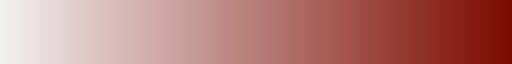

In [93]:
# Set up colormap
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

import seaborn as sns
cmap = sns.diverging_palette(220, 20,  s=150, sep=50, l=25, as_cmap=True)
cmap = truncate_colormap(cmap, 0.6, 1)
cmap

In [94]:
brain_kwargs = dict(alpha=0.5, background='white', cortex='low_contrast')
brain = mne.viz.Brain('subj_10', hemi='both', surf='inflated', subjects_dir=fs_subjs_dir, **brain_kwargs)
kwargs = dict(fmin=pac_mean_hr.data.min(), fmax=pac_mean_hr.data.max(), alpha=0.75,
              smoothing_steps='nearest', colormap=cmap)
brain.add_data(pac_mean_hr.lh_data, hemi='lh', vertices=pac_mean_hr.lh_vertno, **kwargs)
brain.add_data(pac_mean_hr.rh_data, hemi='rh', vertices=pac_mean_hr.rh_vertno, **kwargs)
#brain.add_label(labels[label2index[seed_l]], hemi='lh', color='green', borders=True)
#brain.add_sensors(meg.info, trans)

In [320]:
print(dir(cmap))

['N', '__call__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_gamma', '_i_bad', '_i_over', '_i_under', '_init', '_isinit', '_lut', '_repr_html_', '_repr_png_', '_reverser', '_rgba_bad', '_rgba_over', '_rgba_under', '_segmentdata', '_set_extremes', 'colorbar_extend', 'copy', 'from_list', 'get_bad', 'get_over', 'get_under', 'is_gray', 'monochrome', 'name', 'resampled', 'reversed', 'set_bad', 'set_extremes', 'set_gamma', 'set_over', 'set_under', 'with_extremes']


In [195]:
print(dir(labels[0]))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_load_surface', 'center_of_mass', 'color', 'comment', 'compute_area', 'copy', 'distances_to_outside', 'filename', 'fill', 'get_tris', 'get_vertices_used', 'hemi', 'morph', 'name', 'pos', 'restrict', 'save', 'smooth', 'split', 'subject', 'values', 'vertices']


In [177]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

import mne
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()
subjects_dir = data_path / 'subjects'
sample_dir = data_path / 'MEG' / 'sample'

Automatically created module for IPython interactive environment


In [217]:
8196
stc[2].lh_data.shape

(4098, 1260)

In [225]:
brain_kwargs = dict(alpha=0.5, background='white', cortex='low_contrast')
brain = mne.viz.Brain('subj_10', hemi='both', surf='inflated', subjects_dir=fs_subjs_dir, **brain_kwargs)
brain.add_data(stc[0].lh_data[:, 0], hemi='lh', vertices=stc[0].lh_vertno)


In [208]:
brain_kwargs = dict(alpha=0.1, background='white', cortex='low_contrast')
brain = mne.viz.Brain('sample', subjects_dir=subjects_dir, **brain_kwargs)

stc = mne.read_source_estimate(sample_dir / 'sample_audvis-meg')
stc.crop(0.09, 0.1)
kwargs = dict(fmin=stc.data.min(), fmax=stc.data.max(), alpha=0.25,
              smoothing_steps='nearest', time=stc.times)
brain.add_data(stc.lh_data[:, 0], hemi='lh', vertices=stc.lh_vertno, **kwargs)
brain.add_data(stc.rh_data[:, 0], hemi='rh', vertices=stc.rh_vertno, **kwargs)


In [209]:
print(dir(brain))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_actors', '_add_actor', '_add_label_glyph', '_add_vertex_glyph', '_add_volume_data', '_advance', '_alpha', '_annotation_labels', '_annots', '_bg_color', '_block', '_brain_color', '_check_hemi', '_check_hemis', '_check_stc', '_clean', '_cleaned', '_clear_callbacks', '_clear_widgets', '_closed', '_cmap_range', '_configure_dock', '_configure_dock_colormap_widget', '_configure_dock_orientation_widget', '_configure_dock_playback_widget', '_configure_dock_time_widget', '_configure_dock_trace_widget', '_configure_help', '_configure_label_time_course', '_configure_menu', '_configure_mplcanvas', '_configure_picking', '_configure_playback', '_configure_sca

In [207]:
stc.lh_vertno.shape

(3732,)

In [183]:
stc.lh_data[:10, :]
stc.lh_vertno.shape

(3732,)

In [ ]:
vcs = np.concatenate([k.vertices for k in labels], axis=0)
vcs.shape